# Check whether the Poisson Formulas with Boundary effect are accurate
In Python 3
From Harald Ringbauer
At August 20th 2018

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
def poisson_draw_t(l, t):
    """For Chromosome of length l Morgan, draw 2*t recombination events. Give back the resulting blocks."""
    start=0
    end=0
    itvs = []
    
    rate=2*t # The rate of the process
    
    while True:
        bl = np.random.exponential(scale=1/rate)     
        end = end + bl  # Add to process
        
        if end>=l:  # Break if end of loop reached
            break
        itvs.append(bl)
        
        start=end
            
    itvs.append(l - start) # Attach the last block as well
    return itvs


def replicate_draws(l, t, reps):
    """ Wrapper for poisson_draw_t for replicates
    l: Chromosome length
    t: Time passed
    reps: How many replicates"""
    all_bls = np.concatenate([poisson_draw_t(l, t) for _ in range(reps)])
    return all_bls

def exp_bl_nr(l, t, L, deltal):
    """Analytical Approximation for the Number of Blocks in [L,L+deltaL]
    L length of the total chromosome"""
    l = l + deltal/2.0 # Calculate the midpoint
    
    dens = 2 * np.exp(-2*t*l) * (2 * t) + (2 * t)**2 * np.exp(-2*t*l)    # Block sharing density
    return deltaL * dens    # Return Block Sharing Nr in this Bin
    
def exp_bl_nr_array(t, L, lvec):
    """Analytical Approximation for the Number of Blocks in bins defined by lvec
    L: Length of the total chromosome
    l: Length of the Block.
    t: Time t past"""
    l = (lvec[1:] + lvec[:-1]) / 2    # Calculate the Mid Points
    delta_l = lvec[1:] - lvec[:-1]    # Calculate the Length of the Bins
    
    
    
    # Do the Calculation
    dens = 2 * np.exp(-2*t*l) * (2 * t) + (L - l) * (2 * t)**2 * np.exp(-2*t*l)    # Block sharing density
    dens[L<lvec[1:]]=0
    
    #print(lvec[:-1]<L)
    #print(L<lvec[1:])
    i = np.where((lvec[:-1]<=L) * (L<lvec[1:]))[0]
    
    print(i)
    if len(i)>0:
        dens[i[0]] = np.exp(-2*t*L) / delta_l[i[0]]
    
    # The one that hits the right length:
    
    
    return delta_l * dens

In [26]:
# Test whether roughly enough elements are drawn:
bls = poisson_draw_t(1, 1e5)
print(len(bls))

199652


In [167]:
# Generate large number of replicate blocks:
l=0.5
t=7
reps=100000
all_bls = replicate_draws(l, t, reps)
 
print("Total Number of blocks expected (No boundary): %i" % (l*2*t*reps))  # Without boundary effects
print("Total Number of blocks: %i" % len(all_bls))

Total Number of blocks expected (No boundary): 700000
Total Number of blocks: 799329


[500]


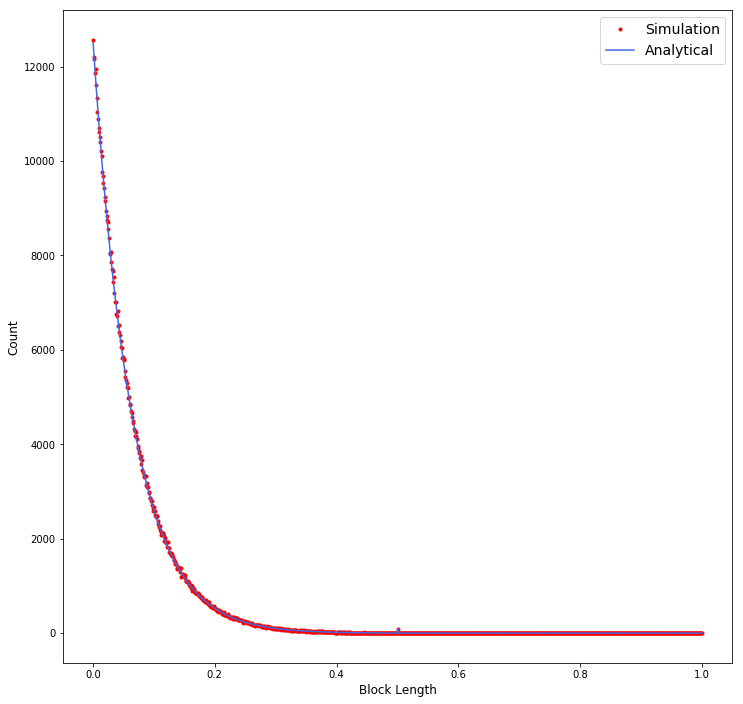

Difference Counts to Formula: -662
Total: 799329


In [168]:
# Make 0.1 cM bins
fs=12

# Bin the Data
bins = np.arange(0, 1.00001, step = 1e-3)
midpoints = (bins[1:] + bins[:-1])/2

# Count the Simulations
counts, _ = np.histogram(all_bls, bins=bins)  # Bin all the Blocks

# Do the analytical approximations:
exp_nr = exp_bl_nr_array(t, L=l, lvec=bins) * reps  


plt.figure(figsize=(12, 12))
plt.plot(midpoints, counts, "ro", ms=3, label="Simulation")
plt.plot(midpoints, exp_nr, color="royalblue", label="Analytical")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Block Length", fontsize=fs)
plt.ylabel("Count", fontsize=fs)
plt.show()

## Calculate the relative Error:
diff = (counts - exp_nr)
print("Difference Counts to Formula: %i" % np.sum(diff))
print("Total: %i" % len(all_bls))

In [48]:
bins = np.arange(0, 1.00001, step = 1e-3)
counts, _ = np.histogram(all_bls, bins=bins)  # Bin all the Blocks

In [49]:
counts

array([1690, 1555, 1513, 1442, 1419, 1292, 1218, 1201, 1249, 1185, 1113,
       1051, 1000, 1009,  957,  901,  873,  849,  782,  733,  698,  682,
        672,  658,  631,  590,  559,  510,  541,  507,  501,  440,  450,
        432,  388,  382,  421,  341,  362,  333,  305,  285,  265,  283,
        308,  241,  266,  237,  252,  227,  210,  215,  189,  195,  166,
        180,  161,  160,  159,  141,  153,  141,  141,  125,  114,  123,
        115,  104,  102,   90,   91,   82,   98,   88,   81,   75,   71,
         56,   59,   69,   63,   68,   55,   58,   54,   49,   33,   40,
         43,   38,   32,   47,   30,   46,   32,   32,   37,   26,   30,
         44,   31,   29,   29,   16,   27,   25,   17,   23,   14,   24,
         19,   18,   18,   18,   11,   12,   14,   11,   11,   14,   14,
          3,   11,   14,    9,   14,   11,   13,    6,    7,    7,    5,
          6,    8,   11,    2,    5,    4,    6,    0,    8,    4,    5,
          3,    7,    1,    3,    3,    3,    2,   

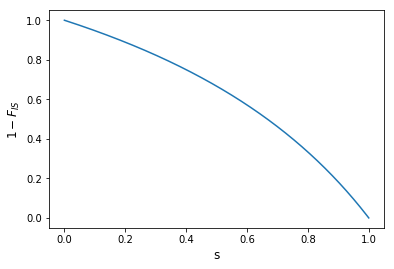

In [121]:
s = np.linspace(0, 1, 1000)

plt.figure()
plt.plot(s, (2 - 2*s)/(2 - s))
plt.xlabel("s", fontsize = 12)
plt.ylabel(r"$1 - F_{IS}$", fontsize = 12)
plt.show()

In [8]:
c = np.around(np.random.laplace(scale = 2.99 / np.sqrt(2), size=100000))
#c = np.random.normal(scale=0.98, size=100000)
np.std(c)

3.0019612461022875